In [2]:
import numpy as np

In [121]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [36]:
# set configurations for number of samples
sample_size = 1000
nr_sample = 20
num_steps = 25


x_b = np.linspace(0,1,num_steps)
x_h = np.linspace(0,20,num_steps)

# cv config
test_size = 0.2
cv = 5
cv_config = [test_size, cv]

### Bounded distributions

In [39]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [40]:
edf_df = dem.get_edf(bounded_samples, x_b)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,dist
0,0.0,0.141,0.201,0.243,0.279,0.319,0.357,0.384,0.410,0.435,...,0.614,0.638,0.668,0.694,0.730,0.767,0.822,0.878,1.0,arcsine
1,0.0,0.129,0.182,0.232,0.277,0.314,0.344,0.368,0.395,0.415,...,0.592,0.622,0.657,0.687,0.717,0.747,0.795,0.861,1.0,arcsine
2,0.0,0.154,0.218,0.266,0.305,0.337,0.370,0.397,0.423,0.444,...,0.633,0.656,0.685,0.712,0.753,0.789,0.832,0.873,1.0,arcsine


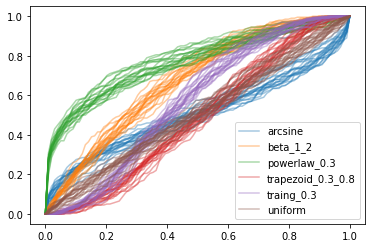

In [7]:
dem.get_edf_plot_2(edf_df, x_b)

### SVM

In [60]:
sample_size_list = [5, 10, 25, 50, 100, 200, 500, 750, 1000]
num_steps_list = list(np.arange(5,200,5))

In [112]:
acc, std, cost, gamma = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, 20, cv_config, 1)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

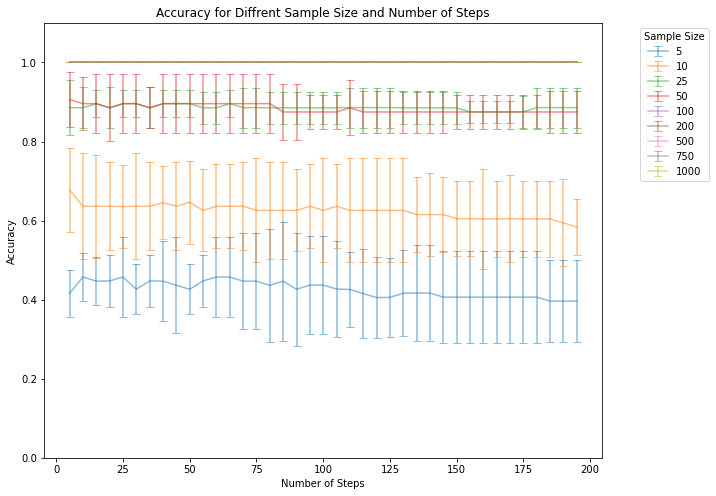

In [114]:
cm.plot_cv_numsteps_samplesize(sample_size_list, num_steps_list, acc, std, errbar=1)

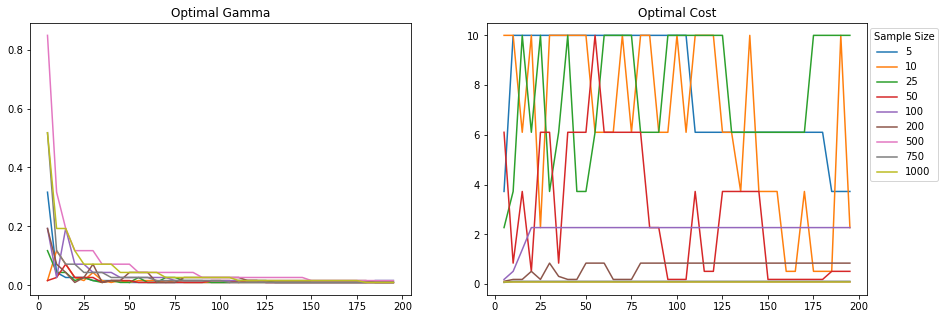

In [115]:
plot_gamma_cost(gamma, cost)

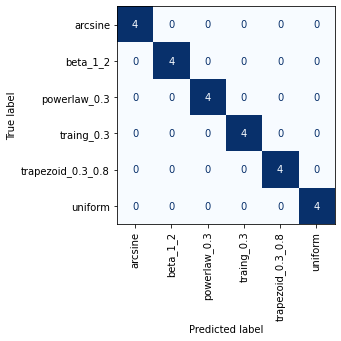

(array([1., 1., 1., 1., 1.]), 0.07196856730011521, 0.19306977288832497)

In [58]:
cm.svm_model(edf_df, test_size, cv, plot=1)

### Logistic Regression

In [122]:
acc_rr, std_rr = cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, 20, cv_config, 2)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

ValueError: too many values to unpack (expected 2)

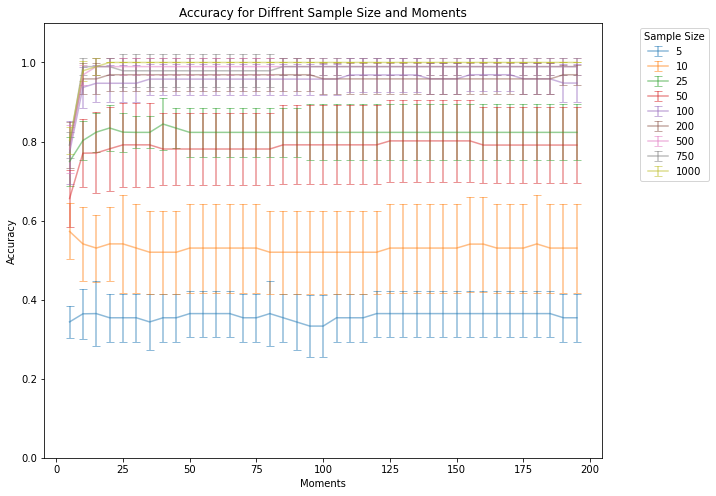

In [116]:
cm.plot_cv_moments(sample_size_list, num_steps_list, acc_rr, std_rr, errbar=1)

### Heavytail distributions

In [32]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [33]:
edf_df = dem.get_edf(heavytail_samples, x_h)
edf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,dist
0,0.0,0.458,0.662,0.756,0.826,0.865,0.881,0.898,0.912,0.923,...,0.956,0.959,0.959,0.961,0.963,0.964,0.965,0.968,0.971,cauchy
1,0.0,0.436,0.645,0.737,0.795,0.842,0.868,0.886,0.898,0.907,...,0.953,0.954,0.957,0.958,0.960,0.962,0.963,0.963,0.967,cauchy
2,0.0,0.473,0.673,0.779,0.832,0.852,0.874,0.889,0.899,0.912,...,0.950,0.951,0.953,0.955,0.958,0.960,0.964,0.964,0.965,cauchy


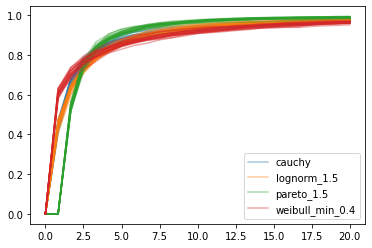

In [34]:
dem.get_edf_plot(edf_df, x_h)

### SVM

In [20]:
acc_ht, std_ht= cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, heavytail_dists, 20, cv_config, 1)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

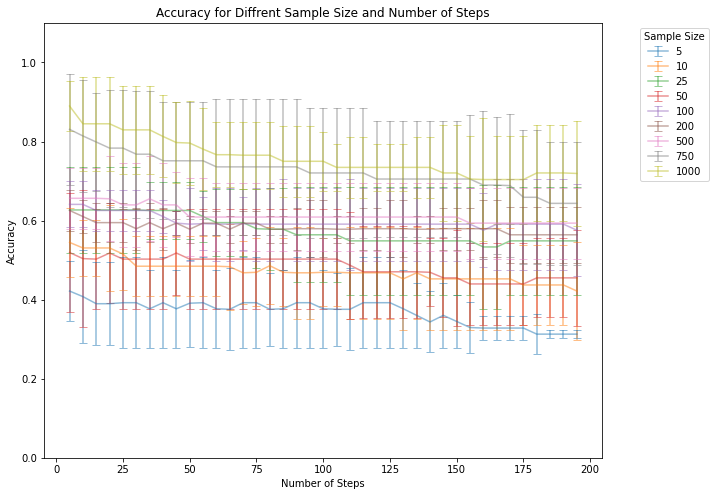

In [21]:
cm.plot_cv_numsteps_samplesize(sample_size_list, num_steps_list, acc_ht, std_ht, errbar=1)

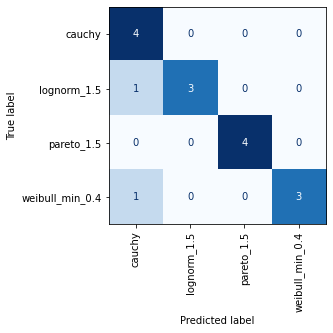

array([1.        , 0.84615385, 0.92307692, 1.        , 1.        ])

In [35]:
cm.svm_model(edf_df, test_size, cv, plot=1)

### Logistic Regression

In [22]:
acc_rr_ht, std_rr_ht= cm.cv_numsteps_samplesize(sample_size_list, num_steps_list, bounded_dists, 20, cv_config, 2)

% completed:   0%|          | 0/9 [00:00<?, ?it/s]

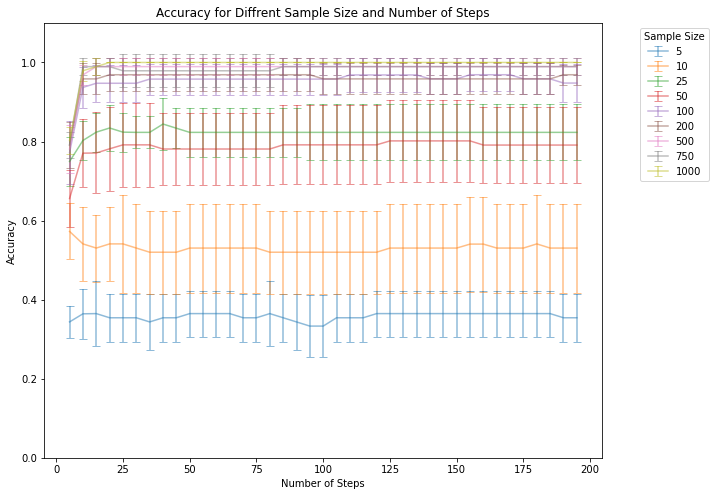

In [23]:
cm.plot_cv_numsteps_samplesize(sample_size_list, num_steps_list, acc_rr_ht, std_rr_ht, errbar=1)

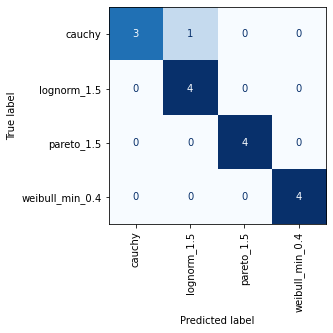

array([0.92307692, 0.76923077, 0.76923077, 0.84615385, 0.75      ])

In [24]:
cm.rr_model(edf_df, test_size, cv, plot=1)

In [110]:
import matplotlib.pyplot as plt
def plot_gamma_cost(gamma, cost):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
    for i in range(len(gamma)):
        ax1.plot(num_steps_list, gamma[i], label = str(sample_size_list[i]))
        ax1.set_title('Optimal Gamma')
        ax2.plot(num_steps_list, cost[i], label = str(sample_size_list[i]))
        ax2.set_title('Optimal Cost')
        ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1), title='Sample Size')
    plt.show()